**Estudiante:** Adriana Castillo


# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-04-20,74142,88.0,14.0,94.0,9.0,0.0,0.0,0.0,102.0,...,24601,0.0,11.0,70.0,0.0,29.0,0.0,0.0,4.0,0.0
112,2020-04-21,77274,35.0,22.0,89.0,4.0,0.0,0.0,0.0,90.0,...,28065,1.0,7.0,92.0,1.0,0.0,0.0,0.0,4.0,0.0
113,2020-04-22,87387,61.0,25.0,93.0,0.0,0.0,0.0,1.0,112.0,...,37289,0.0,8.0,35.0,0.0,29.0,0.0,0.0,0.0,3.0
114,2020-04-23,67629,84.0,25.0,99.0,6.0,0.0,0.0,0.0,144.0,...,17588,0.0,6.0,24.0,0.0,3.0,0.0,0.0,9.0,0.0


Imprimos los resultados y agregamos el numero del dia


In [3]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
...,...,...
111,110,446.0
112,111,660.0
113,112,270.0
114,113,452.0


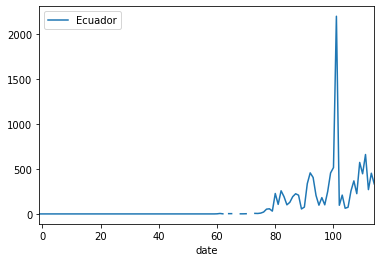

In [4]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [5]:
filtro = df["Ecuador"][61:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

155.0
223.66


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [6]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.replace(np.nan, 0)


FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

11338


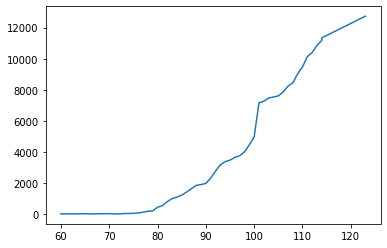

In [7]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

## 1. Comparar el modelo de predicion matematico vs probabilidad.

#### Modelo polinomial

In [8]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

xp = np.array(range(min(x),max(x)))
grado=4
model = LinearRegression()
poly = PolynomialFeatures(degree=grado, include_bias=False)
x_poly = poly.fit_transform(np.array(x).reshape(-1, 1))
model.fit(x_poly, y)
y_pred = model.predict(x_poly)
rl = LinearRegression()
rl.fit(x_poly, y) 
casos = poly.fit_transform(np.array(xp).reshape(-1, 1))
prediccion = rl.predict(casos)
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('w= ',model.coef_,'\nb= ',model.intercept_,'\nRMSE: ' + str(rmse),'\nR2: ' + str(r2))

print ('\nPredicción en una semana:', int(prediccion[122]))


w=  [ 1.07513321e+02 -4.14568499e+00  4.44611042e-02 -7.94705255e-05] 
b=  -503.5455692135406 
RMSE: 549.643659987212 
R2: 0.9811710484699933

Predicción en una semana: 13538


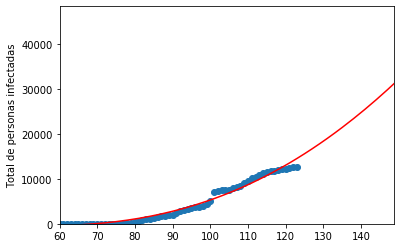

In [9]:
sols = {}
for grado in range(grado,grado+1):
    z = np.polyfit(x, y, grado, full=True)
    sols[grado] = z
    
xp = np.array(range(min(x),max(x)+100))
for grado, sol in sols.items():
    coefs, error, *_ = sol
    p = np.poly1d(coefs)

plt.scatter(x, y)
plt.plot(xp, p(xp), color='r')

plt.xlim(60, max(x)*1.21)
plt.ylim(0, max(y)*3.8)
plt.ylabel("Total de personas infectadas")
plt.show()

#### Modelo probabilístico

In [10]:
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.replace(np.nan, 0)

FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y_p = list(df_t.iloc [:, 1]) # Total casos
x_p = list(df_t.iloc [:, 0]) # Dias
prediccion_semana = int(y_p[-1] + mediana)
print('Predicción:',prediccion_semana)
print('Predicción en una semana: ',y[-1]+7)

Predicción: 11338
Predicción en una semana:  12740


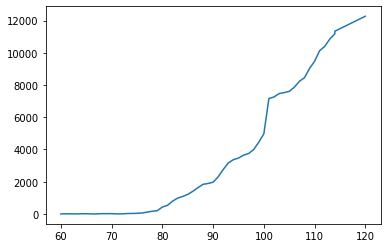

In [11]:
for i in range(x_p[-1], x_p[-1]+7):
    x_p.append(i)
    y_p.append(int(y_p[-1] + mediana))
plt.plot(x_p[61:], y_p[61:])
plt.show()

## 2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.

In [21]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

class Learner(object):
    def __init__(self, country, loss, start_date,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0
        self.R0=0

    def train(self):
        data = y_p
        self.i0=data[-1]
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.35), (0.00000001, 0.23)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        df = pd.DataFrame(y)
        self.R0=(beta/gamma)
        print(f"\n{self.country}, beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
        
def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

poblacion=35000
i0=1
r0=0
s0=poblacion - i0 - r0
sir = Learner('Ecuador', loss, '2020-01-01', s0, i0, r0)
sir.train()


Ecuador, beta=0.35000000, gamma=0.23000000, R0:1.52173913


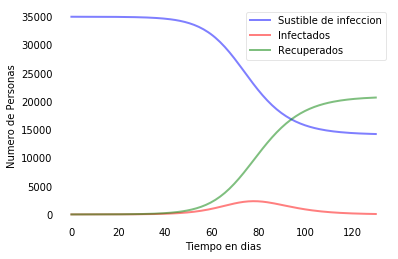

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

N = poblacion
I0 = i0
R0 = 0
S0 = N - I0 - R0
beta, gamma = sir.Beta, sir.Gamma 
t = np.linspace(0, 130, 130)

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## 3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

#### Modelo probabilístico

In [14]:
anterior = df["Ecuador"][61:len(df)-7] # Filtro los datos que se empezo a tener casos
y_anterior = list(df_t.iloc [:, 1]) # Total casos
x_anterior = list(df_t.iloc [:, 0]) # Dias
for i in range(7):
    x_anterior.pop(-1)
    y_anterior.pop(-1)
#Obtenemos la mediana
media_a = anterior.mean()
mediana_a = anterior.median()
print('Mediana Anterior:',mediana_a)
print('Media Anterior:',media_a)
prediccion_anterior = int(y_anterior[-1] + mediana_a)
#print("Predicción: ",prediccion_anterior)
anterior_p=y_anterior[-1]
print('\nDatos reales.')
cont=len(y_anterior)
for i in range(cont,cont+7):
    print('\t',y[i])
print('\nPredicción probabilística semana.')
for i in range(7):
    print('\t',anterior_p+ mediana_a)
    anterior_p=anterior_p+ mediana_a

Mediana Anterior: 101.0
Media Anterior: 191.27906976744185

Datos reales.
	 8450.0
	 9022.0
	 9468.0
	 10128.0
	 10398.0
	 10850.0
	 11183.0

Predicción probabilística semana.
	 8326.0
	 8427.0
	 8528.0
	 8629.0
	 8730.0
	 8831.0
	 8932.0


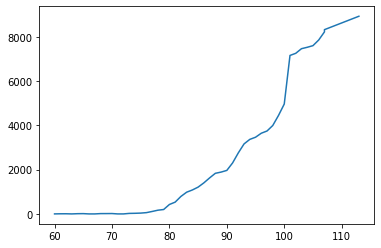

In [15]:
for i in range(x_anterior[-1], x_anterior[-1]+7):
    x_anterior.append(i)
    y_anterior.append(int(y_anterior[-1] + mediana_a))
plt.plot(x_anterior[61:], y_anterior[61:])
plt.show()

#### Modelo matemático

In [16]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

xp = np.array(range(min(x_anterior),max(x_anterior)+7))
grado=4
model = LinearRegression()
poly = PolynomialFeatures(degree=grado, include_bias=False)
x_poly = poly.fit_transform(np.array(x_anterior).reshape(-1, 1))
model.fit(x_poly, y_anterior)
y_pred = model.predict(x_poly)
rl = LinearRegression()
rl.fit(x_poly, y_anterior) 
casos = poly.fit_transform(np.array(xp).reshape(-1, 1))
prediccion = rl.predict(casos)
rmse = np.sqrt(mean_squared_error(y_anterior,y_pred))
r2 = r2_score(y_anterior,y_pred)
print('w= ',model.coef_,'\nb= ',model.intercept_,'\nRMSE: ' + str(rmse),'\nR2: ' + str(r2))
print ('\nPredicción matemática semana:')
for i in range(len(x_anterior)-9,len(x_anterior)-2):
    print('\t',int(prediccion[i]))

w=  [ 2.23281645e+01 -2.86574701e-01 -1.30510636e-02  1.88356316e-04] 
b=  -139.6306392141853 
RMSE: 412.54972279606744 
R2: 0.9767170428440011

Predicción matemática semana:
	 7242
	 7670
	 8114
	 8575
	 9055
	 9552
	 10068


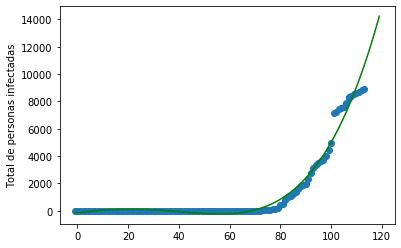

In [17]:
sols = {}
for grado in range(grado,grado+1):
    z = np.polyfit(x_anterior, y_anterior, grado, full=True)
    sols[grado] = z
    
xp = np.array(range(min(x_anterior),max(x_anterior)+7))
for grado, sol in sols.items():
    coefs, error, *_ = sol
    p = np.poly1d(coefs)

plt.scatter(x_anterior, y_anterior)
plt.plot(xp, p(xp), color='g')

plt.ylabel("Total de personas infectadas")
plt.show()

## Analisis

Al comparar los modelos, se puede apreciar que en las predicciones el modelo matemático nos arroja una estimación de 13538 casos mientras que el modelo probabilístico nos da un valor de 12740, vemos que hay una diferencia menor de mil casos. 

Cuando se trata de estimar los valores de la última semana con el modelo probabilístico se aprecia que los datos que se obtienen no se acercan a lo datos reales, y hay una gran diferéncia entre ellos no existe una gran diferencia, por lo tanto, este se acerca más a los valores reales.
Mienstras que con el modélo matemático 

## Conclusiones

Una vez alizados ambos modelos, el modelo polinomial es el que se acerca mucho más a los valores reales, por lo tanto es el más certero. También se debe tener en cuenta que los datos no siguen una linea de crecimiento "normal" por decirlo así, puesto que existen días en los que no suben mucho el número de contagiados y existen otros donde el número de casos se duplica y sube drásticamente el número de casos.
El SIR nos arroja la tasa de contagio de los valores que se están prediciendo en una semanana con el modelo probabilístico y nos obtiene los valores de beta de 0.35 y gamma de 0.23.

## Criterio personal (politico, economico y  social de la situacion)

El ámbito político del país, no creo que haya actuado correctamente y no haya tomado medidas de protección y prevención cuando debería ponerse en práctica. Por otro lado, el número real de casos activos no está claro. Ya sea porque es imposible analizar una gran cantidad de pruebas todos los días para actualizar el número a un número real, o porque está tratando de ocultar la cantidad de casos.

En el frente económico, la pandemia ha tenido un gran impacto en la economía, debido a que las exportaciones y las ganancias se han reducido en gran medida debido al cierre de las fronteras. Esta situación también ha afectado a varios sectores comerciales, ya que algunos de ellos también se han paralizado. La economía familiar también se ve afectada. En algunos casos, les es imposible ir a trabajar día tras día. En algunos casos, tienen más medios de subsistencia.

Con respecto a la situación social, algunas personas aún no se han dado cuenta de esta situación y no respetan las medidas de protección que se han intentado implementar. Los ejemplos vistos en el mercado son como un día normal. , Se infringe el toque de queda o no se resta el último dígito de la placa del número de días en circulación.
Debido a esta actitud, lo único que se puede lograr es extender el tiempo de aislamiento y aumentar el número de infecciones, lo que lleva al colapso del sistema de salud. Desafortunadamente, el número de muertes aumentará.
Por lo tanto, los intentos de "nivelar" la curva de infección serán inútiles.

# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/